## 실습 과제
1. 데이터 분석하기
- (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

In [1]:
! kaggle datasets download -d nikhil7280/weather-type-classification

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 18.2MB/s]


In [3]:
! unzip /content/weather-type-classification.zip

Archive:  /content/weather-type-classification.zip
replace weather_classification_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
import pandas as pd

data = pd.read_csv('/content/weather_classification_data.csv')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
print("데이터의 처음 몇 줄을 출력하여 구조 확인")
data.head()

데이터의 처음 몇 줄을 출력하여 구조 확인


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [12]:
# 데이터의 각 컬럼에 대한 정보 확인
print("데이터의 각 컬럼에 대한 정보 확인")
data.info()

데이터의 각 컬럼에 대한 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [13]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", data.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


In [14]:
# 결측치 파악
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# 중복 데이터 파악
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing Values:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [Temperature, Humidity, Wind Speed, Precipitation (%), Cloud Cover, Atmospheric Pressure, UV Index, Season, Visibility (km), Location, Weather Type]
Index: []


In [15]:
# 각 범주형 변수의 유니크한 값과 빈도수
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", data[col].value_counts())


Unique values in Cloud Cover:
 Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Unique values in Season:
 Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Unique values in Location:
 Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Unique values in Weather Type:
 Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [16]:
# 수치형 데이터의 기초 통계
print("\nDescriptive Statistics for Numerical Data:\n", data[numerical_cols].describe())


Descriptive Statistics for Numerical Data:
         Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              99

In [17]:
# 왜도와 첨도 확인
"""
왜도(Skewness): 0에 가까울수록 정규분포에 근사, 양의 값은 오른쪽 꼬리가 긴 분포(왼쪽으로 치우친), 음의 값은 왼쪽 꼬리가 긴 분포(오른쪽으로 치우친)
첨도(Kurtosis): 0에 가까울수록 정규분포에 근사, 높으면 분포가 뾰족하고, 낮으면 평평
"""

print("\nSkewness of the data:\n", data[numerical_cols].skew())
print("\nKurtosis of the data:\n", data[numerical_cols].kurt())


Skewness of the data:
 Temperature             0.221741
Humidity               -0.401614
Wind Speed              1.360263
Precipitation (%)      -0.152457
Atmospheric Pressure   -0.293899
UV Index                0.900010
Visibility (km)         1.233275
dtype: float64

Kurtosis of the data:
 Temperature              0.586051
Humidity                -0.338366
Wind Speed               3.255194
Precipitation (%)       -1.354039
Atmospheric Pressure    12.778071
UV Index                -0.362166
Visibility (km)          2.517275
dtype: float64


In [18]:
"""
상관계수 값이 1에 가까울수록 완벽한 양의 상관관계, -1에 가까울수록 완벽한 음의 상관관계를 나타냅니다.
"""

# 피어슨 상관 계수
print("Pearson Correlation:\n", data[numerical_cols].corr(method='pearson'))

# 스피어만 상관 계수
print("\nSpearman Correlation:\n", data[numerical_cols].corr(method='spearman'))

Pearson Correlation:
                       Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   

                      Atmospheric Pressure  UV Index  Visibility (km)  
Temperature                       0.209188  0.374773         0.250751  
Humidity                         -0.120653 -0.342694        -0.479969  
Wind Speed                       -0.077757 -0.068147        -0.311828  
Precipitation (%)                -0.177444 -0.291601        -0.45

## 2. 일상생활에서 겪을 만한 사건을 시나리오로 설정하고 데이터 분석

1. 질문하기
2. 작은 단위에서 큰 단위로
3. 여러가지 분석과 결과 분석하기
4. 현장을 이해하고 방향 만들기
5. 스토리 만들기
6. 피드백 준비하기

### 예시. 여러분은 우리나라의 항공사의 최고 경영책임자 입니다.
- 근데 최근에 항공사의 수익성이 점점 약화되어 구조조정을 할 위기입니다.
- 경제가 안좋은건가요? 아니면 장사가 안되는건가요? 근데, 운항하는 비행기마다 늘 만석입니다.
- 근데 요즘 고객분들의 항공사에 데한 만족도가 떨어진다는 조사 결과가 나왔습니다. 아마 이 문제일듯 합니다.
- 여러분은 항공사의 만족도가 떨어지는 문제를 해결하기 위하여 데이터를 분석해야 합니다.

#### 1. 질문하기
- 데이터를 향해 질문해보기
  - 여행 목적에 따른 만족도 차이
- 원하는 바를 향해 질문해보기
  - 가장 고객 만족도를 떨어트리는 원인
- 지식, 생각을 채워나갈 수 있는 질문 해보기
  - 기내 엔터테이먼트가 만족도에 끼치는 영향

In [21]:
! kaggle datasets download -d teejmahal20/airline-passenger-satisfaction

Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
License(s): other
  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 162MB/s]


In [22]:
! unzip /content/airline-passenger-satisfaction.zip

Archive:  /content/airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               


In [23]:
import pandas as pd

data = pd.read_csv('/content/train.csv')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
print("데이터의 처음 몇 줄을 출력하여 구조 확인")
data.head()

데이터의 처음 몇 줄을 출력하여 구조 확인


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
# 데이터의 각 컬럼에 대한 정보 확인
print("데이터의 각 컬럼에 대한 정보 확인")
data.info()

데이터의 각 컬럼에 대한 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location      

다음은 데이터셋의 변수(열)에 대한 설명입니다:

1. **Unnamed: 0**: 인덱스 열로, 의미 없음.
2. **id**: 각 항목의 고유 식별자.
3. **Gender**: 고객의 성별 (남성/여성).
4. **Customer Type**: 고객 유형 (충성 고객 또는 비충성 고객).
5. **Age**: 고객의 나이.
6. **Type of Travel**: 여행 목적 (개인 여행 또는 비즈니스 여행).
7. **Class**: 여행 클래스 (이코노미, 이코노미 플러스, 비즈니스).
8. **Flight Distance**: 비행 거리(마일).
9. **Inflight wifi service**: 기내 와이파이 서비스 평가 (0에서 5).
10. **Departure/Arrival time convenient**: 출발 및 도착 시간의 편리성 평가 (0에서 5).
11. **Ease of Online booking**: 온라인 예약의 편리성 평가 (0에서 5).
12. **Gate location**: 게이트 위치의 편리성 평가 (0에서 5).
13. **Food and drink**: 기내 음식 및 음료 서비스 평가 (0에서 5).
14. **Online boarding**: 온라인 탑승 수속 평가 (0에서 5).
15. **Seat comfort**: 좌석 편안함 평가 (0에서 5).
16. **Inflight entertainment**: 기내 엔터테인먼트 평가 (0에서 5).
17. **On-board service**: 기내 서비스 평가 (0에서 5).
18. **Leg room service**: 다리 공간 서비스 평가 (0에서 5).
19. **Baggage handling**: 수하물 처리 평가 (0에서 5).
20. **Checkin service**: 체크인 서비스 평가 (0에서 5).
21. **Inflight service**: 기내 서비스 평가 (0에서 5).
22. **Cleanliness**: 청결도 평가 (0에서 5).
23. **Departure Delay in Minutes**: 출발 지연 시간(분).
24. **Arrival Delay in Minutes**: 도착 지연 시간(분).
25. **satisfaction**: 고객의 전체 만족도 수준 (만족 또는 중립 또는 불만족).

2. 작은 단위에서 큰 단위로
- 질문을 작은 단위로 쪼개서 데이터로 바꾸기
- 작은 단위의 분석부터 시작하기

#### 질문: 여행 목적과 클래스에 따른 만족도 차이는 어떻게 되나요?
- 데이터 확인
- 여행 목적(Type of Travel), 클래스(Class), 그리고 만족도(satisfaction) 변수를 확인합니다.
여행 목적별 만족도 분포

- 여행 목적별로 만족도(satisfaction)가 "satisfied"인 비율과 "neutral or dissatisfied"인 비율을 계산합니다.
클래스별 만족도 분포

- 클래스별로 만족도(satisfaction)가 "satisfied"인 비율과 "neutral or dissatisfied"인 비율을 계산합니다.
여행 목적과 클래스에 따른 만족도 비교

- 여행 목적 및 클래스에 따라 만족도 차이를 시각화합니다.

In [27]:
# 데이터 확인: 여행 목적(Type of Travel), 클래스(Class), 그리고 만족도(satisfaction) 변수를 확인합니다.
travel_class_satisfaction = data[['Type of Travel', 'Class', 'satisfaction']]

# 여행 목적별 만족도 분포 계산
travel_satisfaction_distribution = travel_class_satisfaction.groupby(['Type of Travel', 'satisfaction']).size().unstack().fillna(0)
travel_satisfaction_distribution_percentage = travel_satisfaction_distribution.div(travel_satisfaction_distribution.sum(axis=1), axis=0) * 100

# 클래스별 만족도 분포 계산
class_satisfaction_distribution = travel_class_satisfaction.groupby(['Class', 'satisfaction']).size().unstack().fillna(0)
class_satisfaction_distribution_percentage = class_satisfaction_distribution.div(class_satisfaction_distribution.sum(axis=1), axis=0) * 100

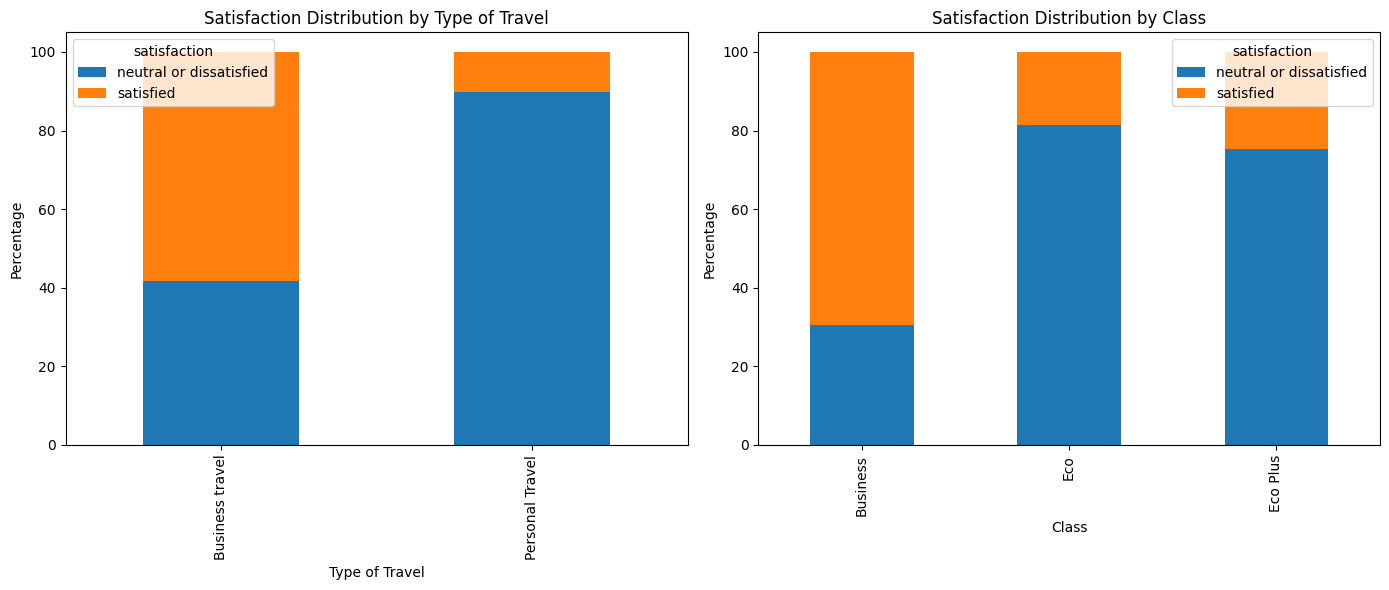

In [28]:
# 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 여행 목적별 만족도 분포
travel_satisfaction_distribution_percentage.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Satisfaction Distribution by Type of Travel')
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Type of Travel')

# 클래스별 만족도 분포
class_satisfaction_distribution_percentage.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Satisfaction Distribution by Class')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Class')

plt.tight_layout()
plt.show()

#### 클래스와 여행 목적에 따른 만족도 분석 결과
- 개인 여행(Personal Travel)

- 이코노미 클래스(Eco): "neutral or dissatisfied" 비율이 높고, "satisfied" 비율이 낮습니다.
- 이코노미 플러스 클래스(Eco Plus): "satisfied" 비율이 중간 정도입니다.
- 비즈니스 클래스(Business): "satisfied" 비율이 가장 높습니다.

- 비즈니스 여행(Business Travel)

- 이코노미 클래스(Eco): "neutral or dissatisfied" 비율이 높고, "satisfied" 비율이 낮습니다.
- 이코노미 플러스 클래스(Eco Plus): "satisfied" 비율이 중간 정도입니다.
비즈니스 클래스(Business): "satisfied" 비율이 가장 높습니다.

#### 종합 분석 결과
- 성별에 따른 만족도

- 남성 고객이 여성 고객보다 약간 더 높은 만족도를 보입니다.

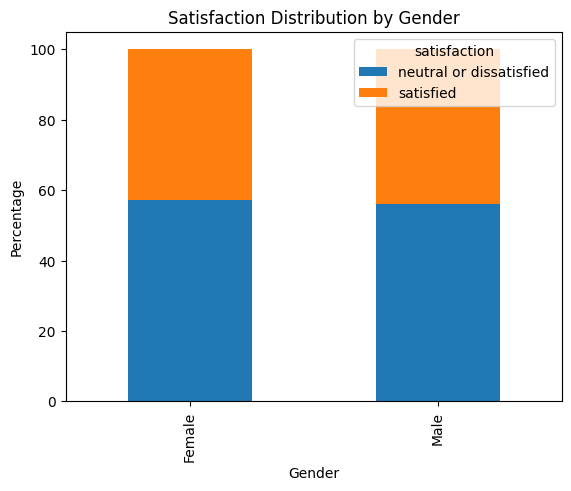

In [30]:
# 성별별 만족도 분포 계산
gender_satisfaction_distribution = data[['Gender', 'satisfaction']].groupby(['Gender', 'satisfaction']).size().unstack().fillna(0)
gender_satisfaction_distribution_percentage = gender_satisfaction_distribution.div(gender_satisfaction_distribution.sum(axis=1), axis=0) * 100

# 시각화
gender_satisfaction_distribution_percentage.plot(kind='bar', stacked=True, title='Satisfaction Distribution by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()


#### 연령대에 따른 만족도
- 19-30세와 31-40세 연령대가 가장 높은 만족도를 보입니다.
- 0-18세와 71-80세 연령대는 상대적으로 낮은 만족도를 보입니다.


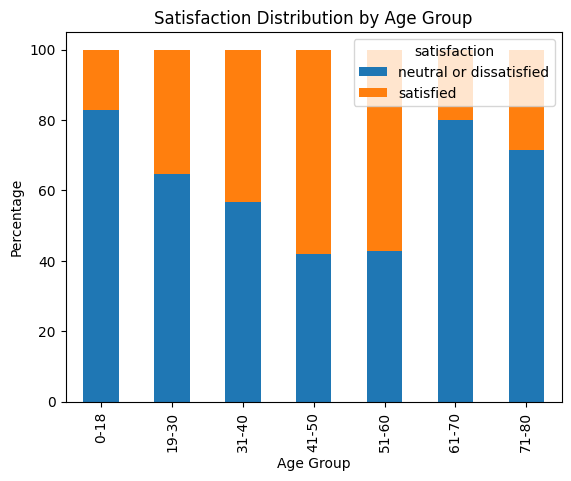

In [31]:
# 연령대를 구간으로 나누기
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# 연령대별 만족도 분포 계산
age_satisfaction_distribution = data[['Age Group', 'satisfaction']].groupby(['Age Group', 'satisfaction']).size().unstack().fillna(0)
age_satisfaction_distribution_percentage = age_satisfaction_distribution.div(age_satisfaction_distribution.sum(axis=1), axis=0) * 100

# 시각화
age_satisfaction_distribution_percentage.plot(kind='bar', stacked=True, title='Satisfaction Distribution by Age Group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.show()

#### 출발 지연 시간과 만족도
- 출발 지연 시간이 길수록 고객의 만족도가 낮아집니다.


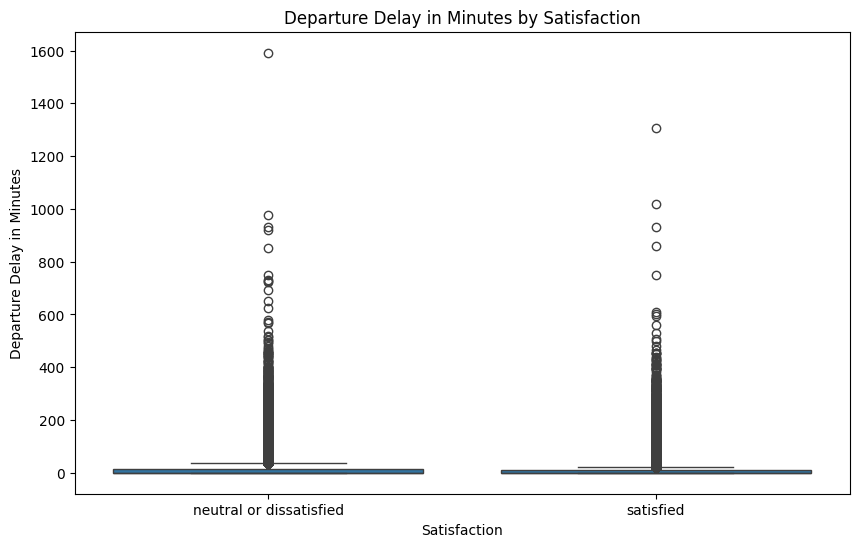

In [33]:
import seaborn as sns

# 출발 지연 시간과 만족도 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=data)
plt.title('Departure Delay in Minutes by Satisfaction')
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Satisfaction')
plt.show()

#### 클래스와 여행 목적에 따른 만족도
- 비즈니스 클래스가 가장 높은 만족도를 보이며,
- 이코노미 클래스가 가장 낮은 만족도를 보입니다.
- 비즈니스 여행객이 개인 여행객보다 전반적으로 더 높은 만족도를 보입니다.

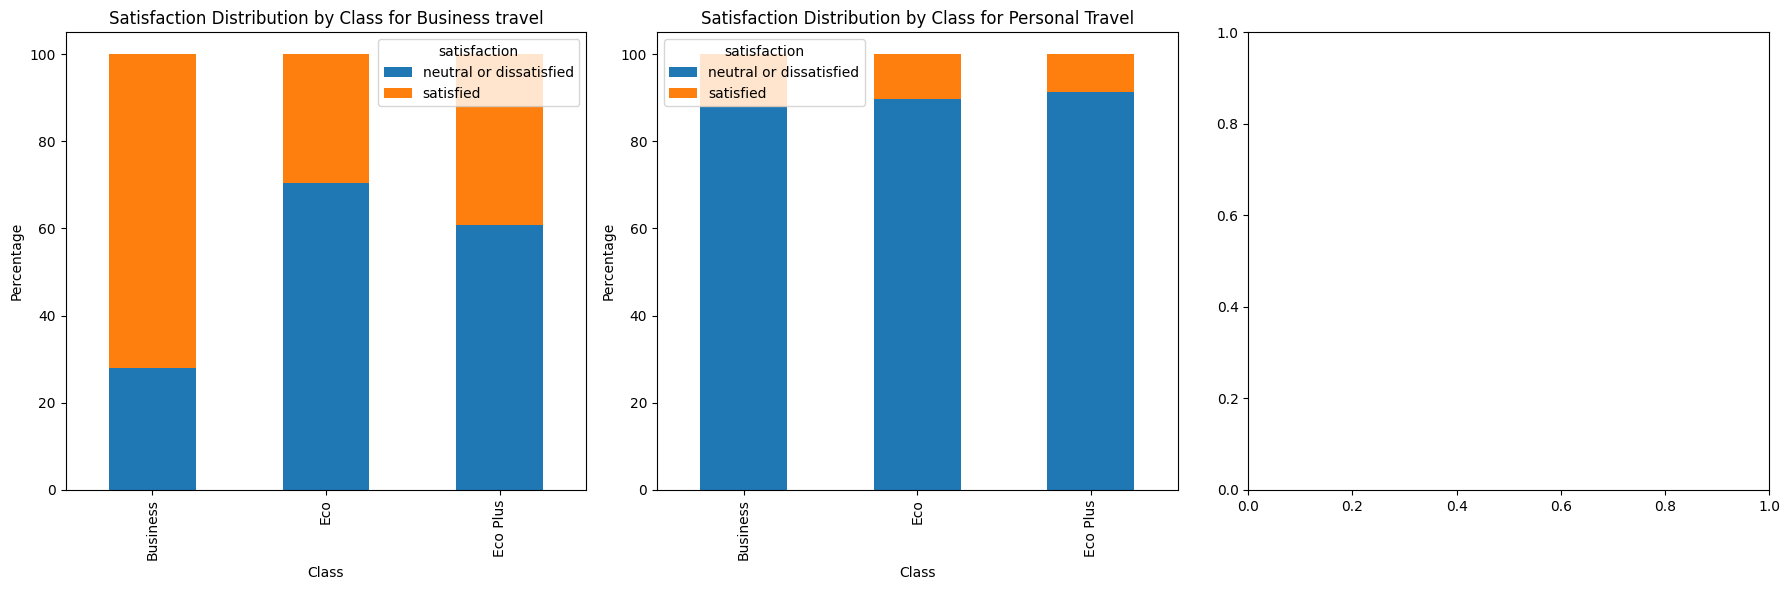

In [34]:
# 클래스와 여행 목적별 만족도 분포 계산
class_travel_satisfaction_distribution = data.groupby(['Class', 'Type of Travel', 'satisfaction']).size().unstack().fillna(0)
class_travel_satisfaction_distribution_percentage = class_travel_satisfaction_distribution.div(class_travel_satisfaction_distribution.sum(axis=1), axis=0) * 100

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, travel_type in enumerate(class_travel_satisfaction_distribution_percentage.index.levels[1]):
    class_travel_satisfaction_distribution_percentage.xs(travel_type, level='Type of Travel').plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Satisfaction Distribution by Class for {travel_type}')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel('Class')

plt.tight_layout()
plt.show()


#### 4. 현장을 이해하고 방향 만들기, 분석 결과를 통해 방향, 전략 수정하기

### 전략 및 방향 수정

1. **이코노미 클래스 서비스 개선**
   - **목표**: 이코노미 클래스 승객의 만족도를 높이기 위한 서비스 개선.
   - **전략**:
     - 좌석 편안함 개선: 추가적인 다리 공간 제공 및 좌석 쿠션 개선.
     - 기내 음식 및 음료 서비스 향상: 다양한 메뉴 제공 및 품질 개선.
     - 기내 엔터테인먼트 옵션 확대: 더 많은 영화, TV 쇼, 음악 등을 제공.
   - **현장 적용**:
     - 승무원 교육을 통해 서비스 개선 방법을 공유하고 적용.
     - 고객 피드백을 정기적으로 수집하여 개선점을 파악.

2. **출발 지연 시간 최소화**
   - **목표**: 출발 지연 시간을 최소화하여 고객 만족도 향상.
   - **전략**:
     - 정시 출발을 위한 프로세스 개선: 체크인 절차 간소화, 수하물 처리 속도 향상.
     - 실시간 정보 제공: 출발 지연 시 고객에게 신속하게 정보를 제공하여 불만 최소화.
   - **현장 적용**:
     - 공항 내 프로세스 효율화 작업 시행.
     - 모바일 앱을 통해 실시간 출발 및 도착 정보 제공.

3. **특정 연령대 및 성별 맞춤형 서비스 제공**
   - **목표**: 고객 특성에 맞춘 맞춤형 서비스 제공으로 만족도 향상.
   - **전략**:
     - 젊은 고객층(19-30세, 31-40세) 대상: 기내 엔터테인먼트 강화, 최신 기술 도입 (Wi-Fi, 충전 포트 등).
     - 고령층(0-18세, 71-80세) 대상: 편안한 좌석, 건강식 메뉴 제공, 승무원 도움 서비스 강화.
   - **현장 적용**:
     - 고객 데이터를 분석하여 맞춤형 서비스 제공.
     - 승무원에게 연령대 및 성별별 서비스 방법 교육.

4. **비즈니스 여행객 대상 추가 혜택 제공**
   - **목표**: 비즈니스 여행객의 만족도 유지 및 향상.
   - **전략**:
     - 비즈니스 클래스 승객 대상 추가 혜택 제공: 빠른 체크인, 라운지 이용권, 기내 편의시설 강화.
     - 비즈니스 여행객 대상 맞춤형 패키지 제공: 출장 맞춤 패키지, 예약 변경 유연성 제공.
   - **현장 적용**:
     - 비즈니스 클래스 승객을 위한 전용 서비스 데스크 운영.
     - 기업 고객과의 제휴 프로그램 강화.

### 현장 적합성 파악

1. **피드백 수집 및 반영**
   - 전략 시행 후 정기적으로 고객 피드백을 수집하여 만족도 변화를 모니터링합니다.
   - 피드백을 기반으로 지속적인 개선 작업을 진행합니다.

2. **직원 교육 및 참여**
   - 승무원 및 공항 직원들에게 새로운 전략과 방향에 대한 교육을 실시합니다.
   - 현장에서 전략이 효과적으로 적용될 수 있도록 직원들의 의견을 수렴하고 참여를 유도합니다.

3. **데이터 분석 및 모니터링**
   - 지속적으로 데이터를 분석하여 전략이 고객 만족도에 미치는 영향을 평가합니다.
   - 데이터에 기반한 의사결정을 통해 전략을 지속적으로 조정합니다.

### 5. 스토리 만들기

#### 1. 경영진 대상 스토리
**배경**
최근 고객 만족도 조사에서 특정 항목에 대한 불만이 증가하고 있습니다. 이를 해결하기 위해 성별, 연령대, 여행 목적 및 클래스별로 분석한 결과를 바탕으로 전략을 제안합니다.

**분석 결과 요약**
- 남성 고객이 여성 고객보다 약간 높은 만족도를 보입니다.
- 19-30세와 31-40세 연령대가 가장 높은 만족도를 보이는 반면, 0-18세와 71-80세 연령대는 상대적으로 낮은 만족도를 보입니다.
- 출발 지연 시간이 길수록 고객의 만족도가 낮아집니다.
- 비즈니스 클래스가 가장 높은 만족도를 보이며, 이코노미 클래스가 가장 낮습니다.
- 비즈니스 여행객이 개인 여행객보다 더 높은 만족도를 보입니다.

**제안된 전략**
1. **이코노미 클래스 서비스 개선**
   - 좌석 편안함, 기내 음식 및 음료 서비스, 기내 엔터테인먼트 옵션 개선.

2. **출발 지연 시간 최소화**
   - 체크인 절차 간소화, 수하물 처리 속도 향상, 실시간 정보 제공.

3. **맞춤형 서비스 제공**
   - 연령대별, 성별별 맞춤형 서비스 제공.

4. **비즈니스 여행객 대상 추가 혜택 제공**
   - 비즈니스 클래스 승객 대상 추가 혜택 및 맞춤형 패키지 제공.

**기대 효과**
- 고객 만족도 증가.
- 충성 고객 비율 증가.
- 항공사 이미지 개선 및 시장 경쟁력 강화.

#### 2. 현장 직원 대상 스토리
**배경**
고객 만족도 향상을 위해 새로운 전략을 시행합니다. 여러분의 적극적인 참여와 협조가 필요합니다.

**분석 결과 요약**
- 출발 지연 시간이 길수록 고객 만족도가 낮습니다.
- 이코노미 클래스 승객의 만족도가 낮습니다.
- 특정 연령대와 성별에 따라 만족도 차이가 있습니다.

**새로운 전략**
1. **이코노미 클래스 서비스 개선**
   - 좌석 편안함 개선: 더 많은 다리 공간과 편안한 좌석 제공.
   - 기내 음식 및 음료 서비스 향상.
   - 기내 엔터테인먼트 옵션 확대.

2. **출발 지연 시간 최소화**
   - 체크인 절차를 더 간소화하고, 수하물 처리를 신속하게 하여 출발 시간을 맞추도록 노력합니다.
   - 실시간으로 고객에게 출발 지연 정보를 제공하여 불만을 최소화합니다.

3. **맞춤형 서비스 제공**
   - 젊은 고객층을 위해 최신 기술과 엔터테인먼트를 제공하고, 고령층을 위해 편안한 좌석과 건강식을 제공합니다.
   - 성별에 따라 맞춤형 서비스를 제공합니다.

4. **비즈니스 여행객 대상 추가 혜택 제공**
   - 비즈니스 클래스 승객을 위한 추가 혜택을 제공합니다.

**현장 적용 방법**
- 각 서비스 개선 사항을 적극적으로 실천하고, 고객의 피드백을 즉시 반영합니다.
- 정기적인 교육과 회의를 통해 개선 사항을 공유하고 논의합니다.

**기대 효과**
- 고객 만족도가 향상되면, 더 많은 충성 고객을 확보할 수 있습니다.
- 고객의 긍정적인 피드백은 항공사의 이미지를 개선하는 데 큰 도움이 됩니다.

### 6. 피드백 준비하기

#### 1. 데이터 수집 전략
1. **정기적인 고객 만족도 조사**
   - 고객에게 정기적으로 설문조사를 실시하여 서비스 개선 사항에 대한 피드백을 받습니다.
   - 설문조사 결과를 데이터베이스에 저장하여 분석합니다.

2. **실시간 피드백 수집**
   - 모바일 앱이나 웹사이트를 통해 고객이 실시간으로 피드백을 제공할 수 있도록 합니다.
   - 비행 후 즉시 피드백을 요청하여 생생한 의견을 수집합니다.

3. **사회적 미디어 모니터링**
   - 소셜 미디어에서 언급된 고객의 의견을 모니터링하여 긍정적, 부정적 피드백을 분석합니다.

4. **직원 피드백**
   - 현장 직원의 의견을 수집하여 개선 사항을 파악합니다.
   - 직원 회의를 통해 정기적으로 피드백을 공유하고 논의합니다.

#### 2. 피드백 전략 수립 및 분석

**피드백 수집 방법**
- 설문조사: 이메일, 모바일 앱, 웹사이트를 통해 고객에게 정기적으로 설문조사를 보냅니다.
- 실시간 피드백: 비행 후 고객에게 즉시 피드백을 요청합니다.
- 소셜 미디어: 트위터, 페이스북, 인스타그램 등에서 고객의 의견을 수집하고 분석합니다.
- 직원 피드백: 정기적인 회의와 설문조사를 통해 직원의 의견을 수집합니다.

**피드백 분석 방법**
- 데이터베이스에 저장된 피드백을 정기적으로 분석하여 주요 문제점을 파악합니다.
- 피드백을 바탕으로 개선 사항을 도출하고, 이를 반영한 새로운 전략을 수립합니다.

**현장 적용**
- 분석 결과를 바탕으로 현장에서 즉시 적용 가능한 개선 사항을 도출합니다.
- 정기적인 교육과 회의를 통해 직원들에게 피드백 결과를 공유하고, 이를 반영한 전략을 실행합니다.
